# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Nick Balesky</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


The different classes are Animal_Agent and Environment. Animal_Agent creates an animal (predator or prey) and gives functions for the animal to move, find prey, find mates, age, and procreate. The Environment class sets an environment for animals to move within. They can be used to create an ABM because the environment sets the area for the animals, Animal_Agent creates animals and gives them functions to simulate a real world experience and they move through the model and follow the rules outlined in the code to model live animal interactions

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

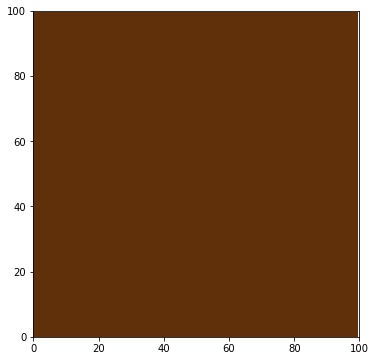

In [1]:
#Write your code here

from Animal_Agent_Class import Animal_Agent
from Environment import Environment

world = Environment()

female_animal = Animal_Agent(sex="F")

world.add_agent(female_animal)

world.simulate(tot_time=100)

*Explain the bug here.*

The bug is the parameters dt and self.animal_agents were flipped to the last line below.
                    
        if agent.check_if_dead():
            del agent
        else:
            temp_agents.append(agent)
            temp_new_agents = agent.procreate(dt, self.animal_agents)

The line should read: temp_new_agents = agent.procreate(self.animal_agents, dt)


### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


In [2]:
#Write your code here

def simulate(self,tot_time):
    for dt in range(tot_time):
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))    
        plt.imshow(self.environ) 
        ax = plt.gca()   
            
        # loop over each animal
        temp_agents = []
        temp_hunted_agents = []
        for agent in self.animal_agents:
            agent.roaming()
            agent.draw(ax)
                
            if agent.ptype == "Prey":
                agent.aging()
                    
                if agent.check_if_dead():
                    del agent
                else:
                    temp_agents.append(agent)
                    temp_new_agents = agent.procreate(self.animal_agents, dt)
                    if len(temp_new_agents) > 0:
                        temp_agents.extend(temp_new_agents)
            elif agent.ptype == "Predator":
                caught_prey = agent.hunt(self.animal_agents)
                if caught_prey:
                    temp_hunted_agents.append(caught_prey)
                temp_agents.append(agent)
            
        for agent in temp_hunted_agents:
            temp_agents.remove(agent)        
        self.animal_agents.clear
        self.animal_agents = temp_agents
        plt.xlim(0,self.xsize)
        plt.ylim(0,self.ysize)
        plt.show()   
        time.sleep(0.001)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

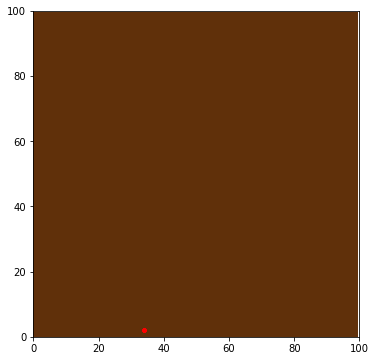

In [3]:
#Write your code here
new_world = Environment()

female_animal = Animal_Agent(sex="F")

pred = Animal_Agent(ptype="Predator", shape="P", color="red")

new_world.add_agent(female_animal)
new_world.add_agent(pred)

new_world.simulate(tot_time=100)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

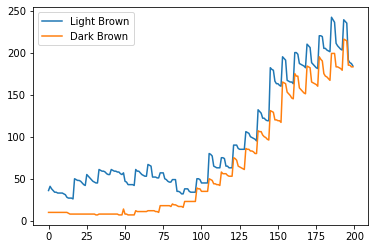

In [59]:
from Animal_Agent_Class import Animal_Agent
from Environment import Environment
import random
import numpy as np

world = Environment()

N_Prey = 47
N_Predator = 3

for i in range(N_Prey):
    sex = random.choice(["M", "F"])
    allele_1 = random.choice([0, 1])
    allele_2 = random.choice([0, 1])
    new_prey = Animal_Agent(sex=sex, ptype='Prey')
    new_prey.set_allele(allele_1, allele_2)
    world.add_agent(new_prey)
    
for i in range(N_Predator):
    sex = random.choice(["M", "F"])
    new_predator = Animal_Agent(sex=sex, ptype='Predator', shape='P', color='red')
    world.add_agent(new_predator)

world.simulate_plot_populations(200)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The graph forms a staircase or "steps" shape because the populations are constant for a period of time and then there is a shift and the population changes then remains constant for a period of time before shifting again

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [50]:
class Mouse(Animal_Agent):
    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.ptype = ptype
        self.age_limit = age_limit
        self.catch_radius = catch_radius
        self.xmax = xmax
        self.ymax = ymax
        self.sex = sex
        self.gestation = gestation
        self.last_litter_time = 1
        self.mate_range = mate_range 
        self.color = color
        self.shape = shape
        self.saturation_pop = saturation_pop
        self.is_caught = False
            
    def set_allele(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        '''
        
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
            
        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05
            
    def get_allele_d(self):
        return self.alle_d
    
    def get_allele_m(self):
        return self.alle_m
    
    def get_catch_probability(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        '''
        
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
            
        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05
        
        return self.catch_probability
    
    def Procreate(self):
        # Generate a new mouse with the same position
        return Mouse(self.x, self.y)

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [51]:
class Hawk(Animal_Agent):
    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.ptype = ptype
        self.age_limit = age_limit
        self.catch_radius = catch_radius
        self.xmax = xmax
        self.ymax = ymax
        self.sex = sex
        self.gestation = gestation
        self.last_litter_time = 1
        self.mate_range = mate_range 
        self.color = color
        self.shape = shape
        self.saturation_pop = saturation_pop
        self.is_caught = False
    
    def hunt(self,all_agents):
        '''
        Method for a predator to find prey. If the predator finds prey, the method sets the is_caught flag 
        and returns the prey object so it can be removed from the environment. 

        all_agents (list): A list of all of the animal agent objects 
        '''
        
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius:
                    var = random.randint(0, 1)
                    if var < Mouse.get_catch_probability(agent, Mouse.get_allele_d(agent), Mouse.get_allele_m(agent)):
                        agent.is_caught = True
                        return agent       
            return False

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

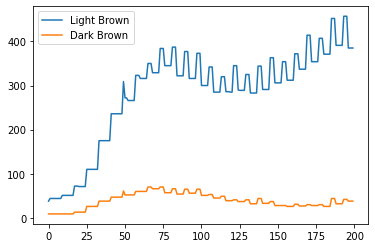

In [61]:
from Animal_Agent_Class import Animal_Agent
from Environment import Environment
import random
import numpy as np

world = Environment()

N_Prey = 47
N_Predator = 3

for i in range(N_Prey):
    sex = random.choice(["M", "F"])
    allele_1 = random.choice([0, 1])
    allele_2 = random.choice([0, 1])
    new_prey = Mouse(sex=sex, ptype='Prey')
    new_prey.set_allele(allele_1, allele_2)
    world.add_agent(new_prey)
    
for i in range(N_Predator):
    sex = random.choice(["M", "F"])
    new_predator = Hawk(sex=sex, ptype='Predator', shape='P', color='red')
    world.add_agent(new_predator)

world.simulate_plot_populations(200)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

The difference using the Hawk and Mouse class and the results in 1.5 is that over time (many simulations), the mice populations grow further apart based on color. The color with a lower catch_probability becomes more popular and the high catch_probability mice die because they are killed by the predators easier. This translates to natural selection because it's the survival of the fittest and the colors with a better chance of surviving will become more popular far in the future.

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.